<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/ROC_curve_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


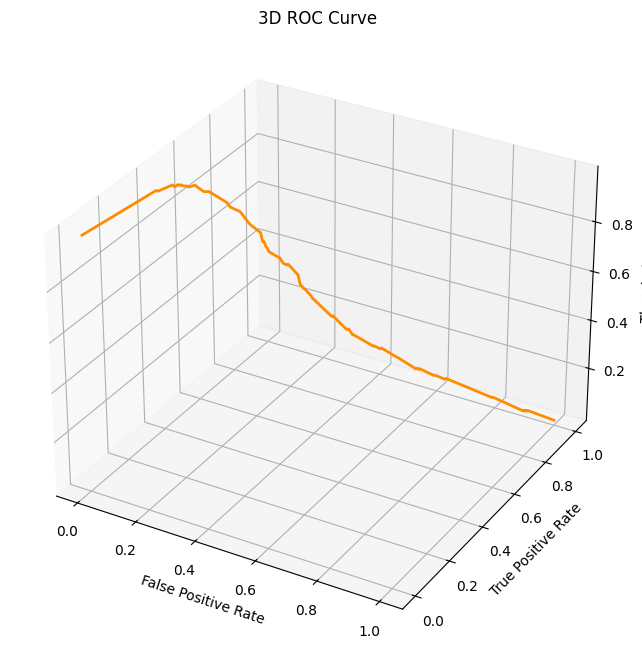

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Генерация случайных данных для бинарной классификации
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Получение предсказанных вероятностей для положительного класса
y_scores = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Построение 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Создание 3D графика с FPR на оси X, TPR на оси Y и порогами на оси Z
ax.plot(fpr, tpr, thresholds, color='darkorange', lw=2)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_zlabel('Threshold')
ax.set_title('3D ROC Curve')

plt.show()


In [2]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Генерация случайных данных для бинарной классификации
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Получение предсказанных вероятностей для положительного класса
y_scores = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Создание интерактивного 3D графика
fig = go.Figure(data=[go.Scatter3d(
    x=fpr,
    y=tpr,
    z=thresholds,
    mode='lines+markers',
    marker=dict(size=5),
    line=dict(width=2)
)])

# Настройка осей и заголовка
fig.update_layout(
    scene=dict(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        zaxis_title='Threshold',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1))
    ),
    title='3D ROC Curve'
)

# Отображение графика
fig.show()
